In [87]:
import cv2 
from google.colab.patches import cv2_imshow

In [88]:
# membaca image
image = cv2.imread("003.jpg")

In [89]:
print(image)

[[[178 180 188]
  [175 177 185]
  [174 176 184]
  ...
  [171 169 168]
  [172 170 169]
  [172 170 169]]

 [[174 176 184]
  [172 174 182]
  [172 174 182]
  ...
  [172 170 169]
  [172 170 169]
  [172 170 169]]

 [[174 176 184]
  [172 174 182]
  [172 174 182]
  ...
  [173 171 170]
  [173 171 170]
  [173 171 170]]

 ...

 [[156 151 153]
  [155 150 152]
  [155 150 152]
  ...
  [160 156 162]
  [161 157 163]
  [162 158 164]]

 [[155 150 152]
  [155 150 152]
  [154 149 151]
  ...
  [159 155 161]
  [160 156 162]
  [160 156 162]]

 [[154 149 151]
  [154 149 151]
  [153 148 150]
  ...
  [159 155 161]
  [158 154 160]
  [158 154 160]]]


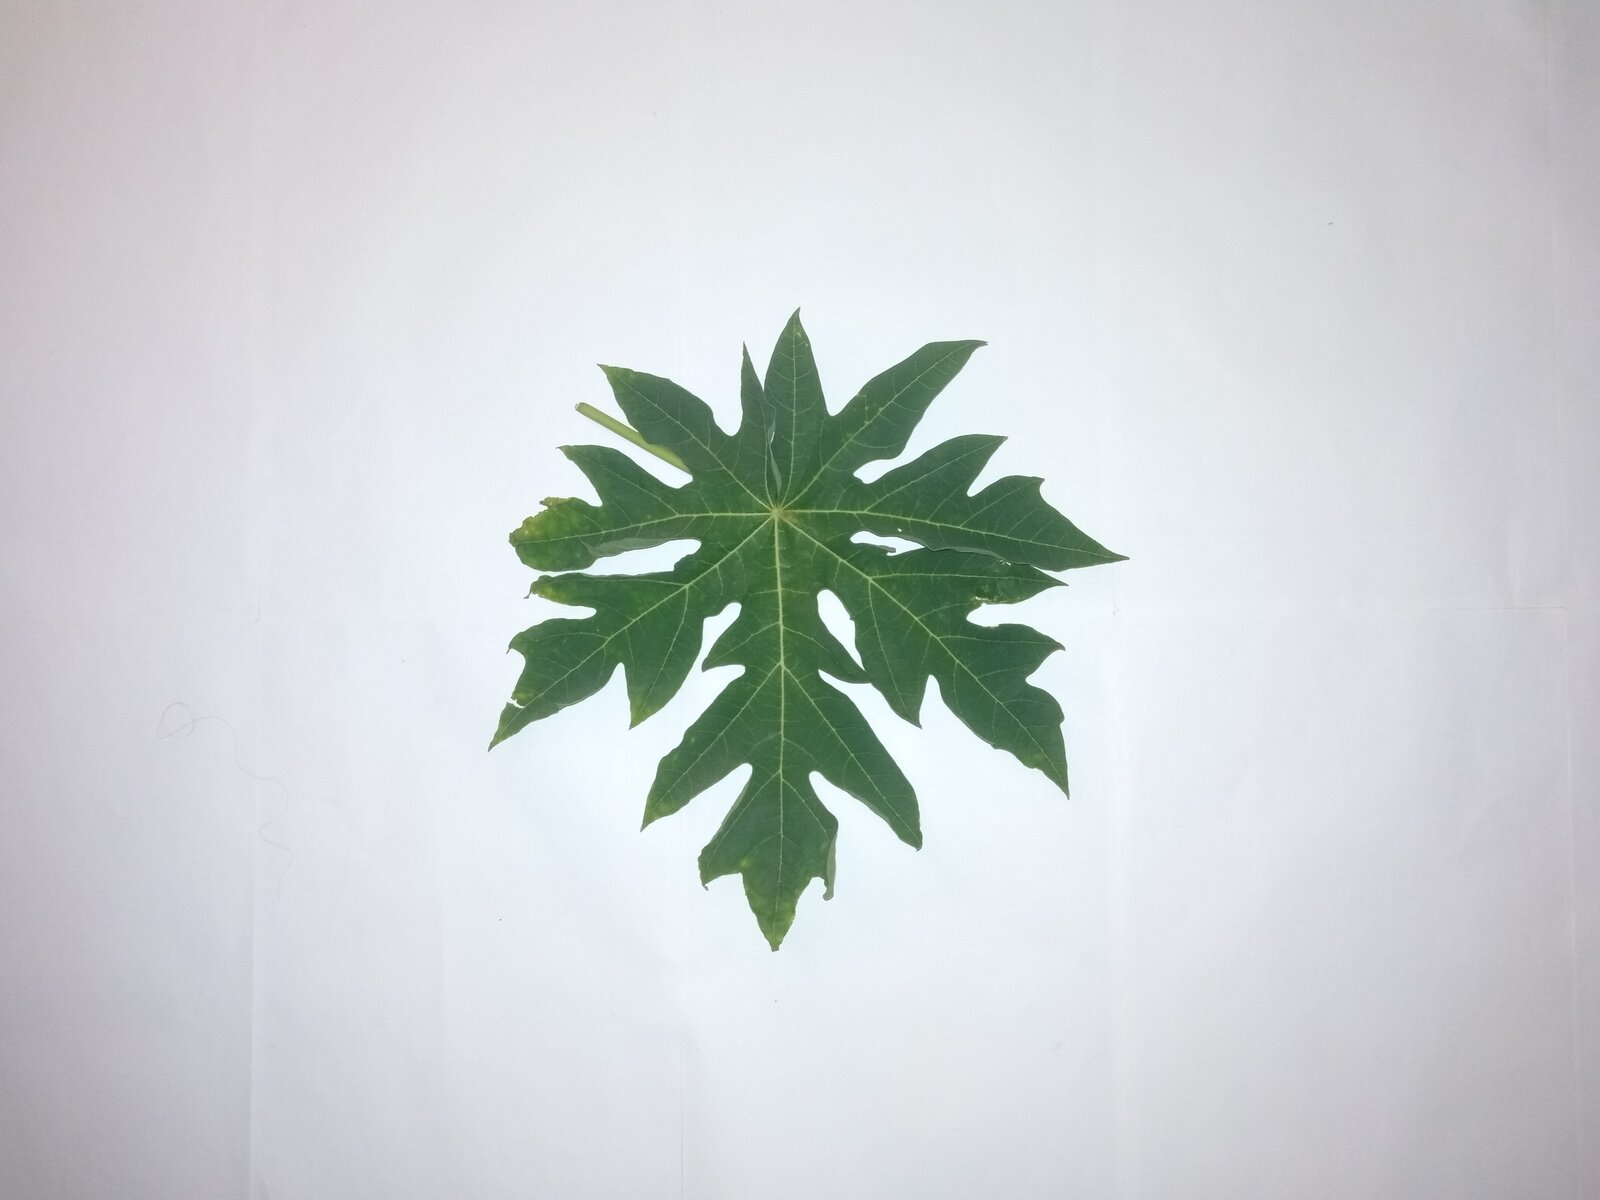

In [90]:
# menampilkan image
cv2_imshow(image)

In [91]:
print(image.shape)

(1200, 1600, 3)


In [92]:
# mengakeses nilai di pixel x=100, y=20
(b, g, r) = image[20, 100]
print("blue =" ,b)
print("green =" ,g)
print("red =" ,r)

blue = 190
green = 187
red = 196


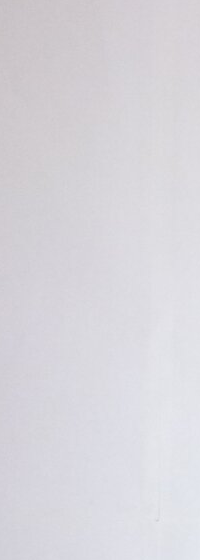

(560, 200, 3)


In [93]:
# crop image
im_crop = image[100:660, 100:300]

cv2_imshow(im_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(im_crop.shape)

In [94]:
# mengcopy image
cp_image = image.copy()
print(cp_image.shape)

(1200, 1600, 3)


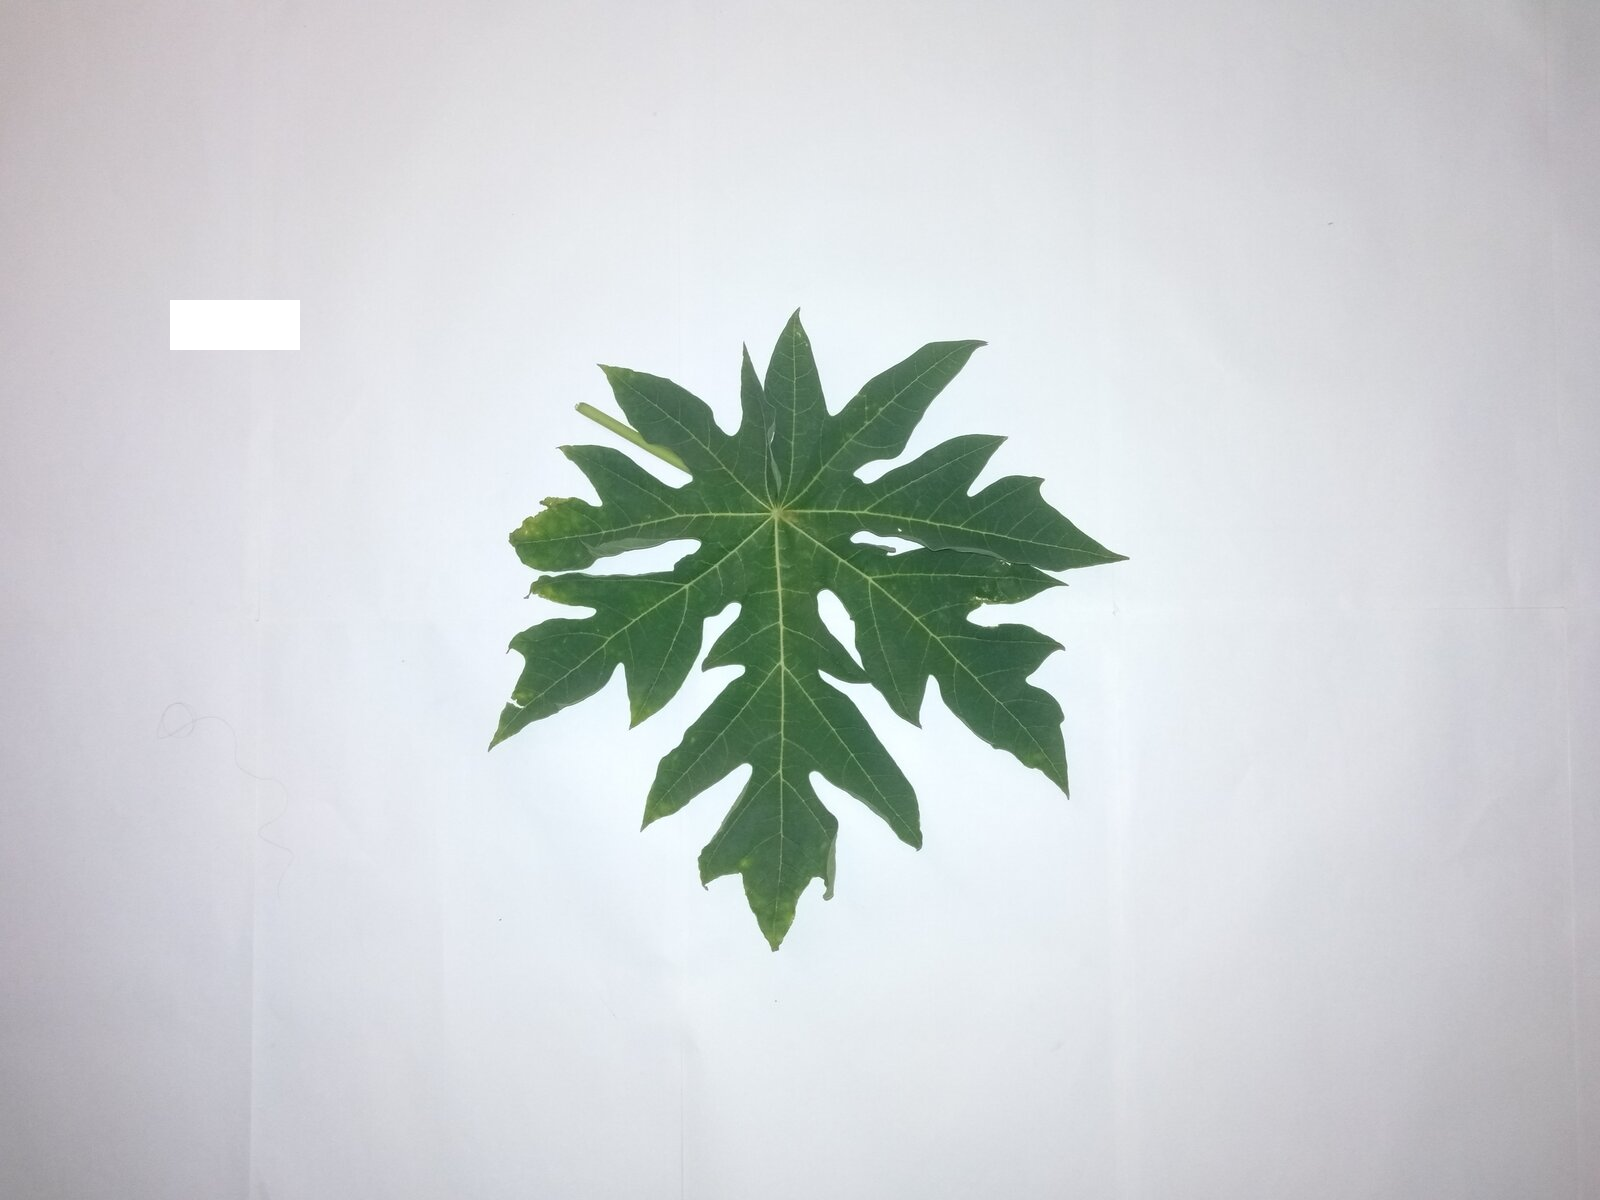

In [95]:
# mengubah nilai pixel
cp_image[300:350, 170:300] = (255, 255, 255)

cv2_imshow(cp_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

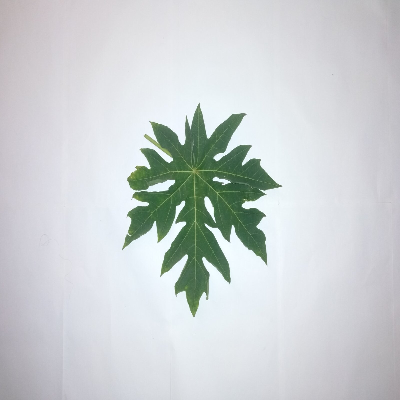

In [96]:
# resize image (ignore aspect ratio)
im_resized = cv2.resize(image, (400,400))

cv2_imshow(im_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

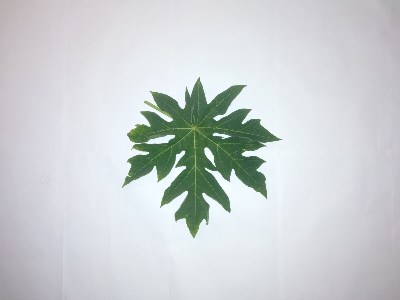

In [97]:
# resize image (Mempertahankan aspek ratio)
r = 400/image.shape[1]
dim = (400, int(image.shape[0]*r))
im_resized = cv2.resize(image, dim)

cv2_imshow(im_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

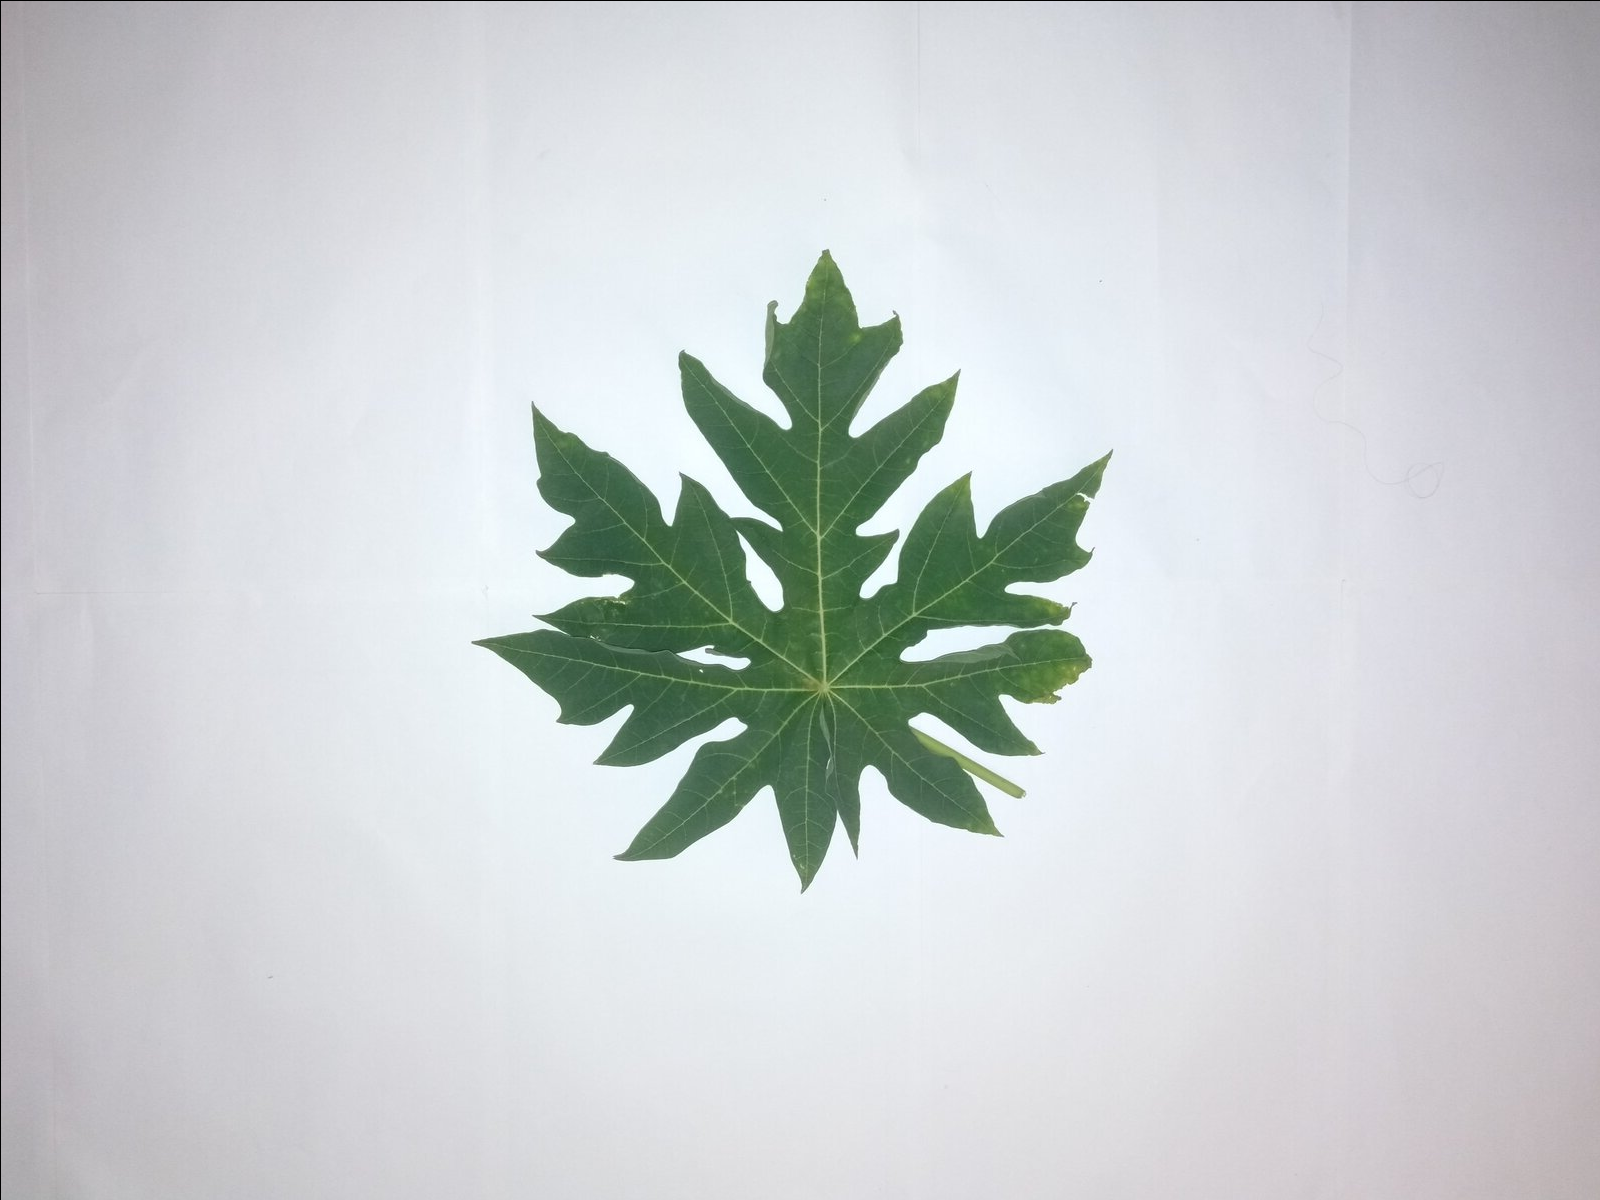

In [98]:
# rotating an image
(h, w) = image.shape[:2]
center = (w/2, h/2)

M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotate = cv2.warpAffine(image, M, (w,h))

cv2_imshow(rotate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [99]:
# menyimpan Image
cv2.imwrite("rotate.png", rotate)

True

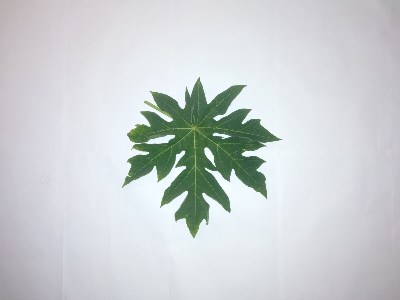

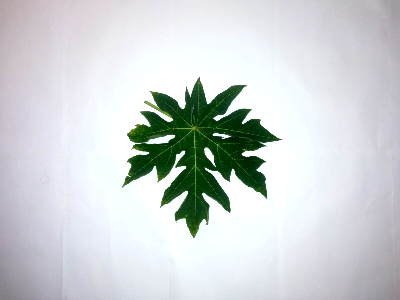

In [100]:
#adjust image contrast
import numpy as np
im_adjusted = cv2.addWeighted(im_resized, 1.5, np.zeros(im_resized.shape, im_resized.dtype), 0, -100)


cv2_imshow(im_resized)
cv2_imshow(im_adjusted)
cv2.waitKey(0)
cv2.destroyAllWindows()

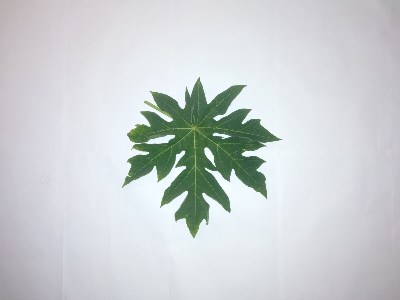

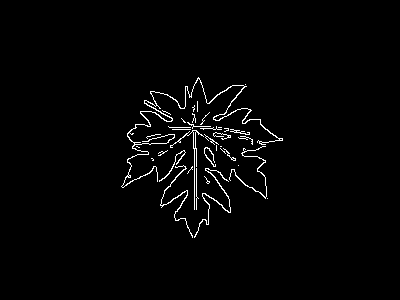

In [101]:
# detect edges
im_edges = cv2.Canny(im_resized, 100, 200)

cv2_imshow(im_resized)
cv2_imshow(im_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

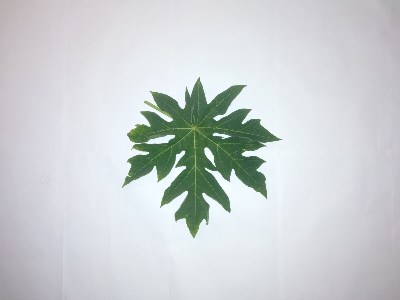

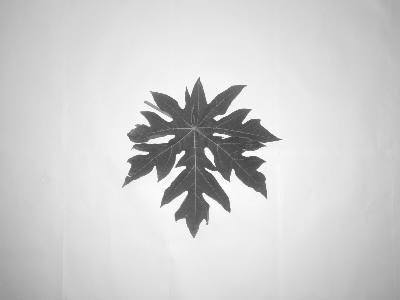

In [102]:
# covert image to greyscale
im_gray = cv2.cvtColor(im_resized, cv2.COLOR_BGR2GRAY)

cv2_imshow(im_resized)
cv2_imshow(im_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [106]:
import cv2
import glob

imdir = 'Dataset/Pepaya/'
ext = ['jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]
i = 1
for img in images:
    r = 400 / img.shape[1]
    dim = (400, int(img.shape[0] * r))
    im_resized = cv2.resize(img, dim)
    im_edges = cv2.Canny(im_resized, 100, 200)
    im_name = "Dataset/Pepaya_edges/" + str(i) + ".jpg"
    cv2.imwrite(im_name, im_edges)
    i+= 1